# Марковская цепь

Пусть $E$ - некоторое дискретное (конечное или счётное) множество, которое называют пространством состояний.

**Примеры:**
- $E1=\{солнечно,пасмурно,дождь,снег\}$ - пространство погодных условий
- $E2=\{а,б,…,я\}$ - пространство кириллических букв
- $E3=ℕ=\{0,1,…,\}$ - пространство целых чисел (число студентов в классе)

Если система находится в состоянии $i \in E$ в момент времени $n$, то в момент времени $n+1$ она может перейти в состояние $j \in E$ с переходной вероятностью $p_{ij}$.

Например для кириллицы $p_{п,р}=0.278$  $p_{п,ы}=0.009$

![Markov Model](img/markov.png)

Свойства переходной вероятности:

$\forall i, j \in E$    $p_{ij}>=0$ и $\forall i \in E \sum_{j \in E} p_{ij} = 1$

Переходные вероятности образуют матрицу переходных вероятностей

**Марковская** цепь с пространством состояний $E$ и матрицей переходных вероятностей $P$ - это случайный процесс с дискретным временем $X=(X_n) n \in ℕ$, $X_n \in E$, для которого:
- известны начальные распределения $α_i ≡ P(X_0=i)$,
- верно марковское свойство: для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_{n+1}=j|X_0=i_0,...,X_{n-1}=i_{n-1}, X_n=i)=P(X_{n+1}|X_n=i)=p_{ij}$

если $p(X_0=i_0,…,X_n=i)>0.$

Неформально говоря, марковское свойство означает, что то, как система будет развиваться в текущий момент, не зависит от того, что было в прошлом и зависит только от настоящего.

# Оценка матрицы переходных вероятностей

Дана последовательность наблюдений

$X_1,X_2,…,X_N X_i \in E$.

Как подсчитать матрицу переходных вероятностей $p_{ij}=P(X_{n+1}=j|X_n=i)$?

**Закон больших чисел:**
Частота некоторого события в серии независимых испытаний приближается (и остается близкой) к его вероятности:

$\nu_n(A) \to P(A) (n \to \infty), \nu_n(A)= \dfrac{n_A}{n}$
$p_{ij}=P(X_{n+1}=j|X_n=i)\approx \dfrac{1}{N} \sum\limits_{n=1} I(X_{n+1}=j|X_n=i)$

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [3]:
with open('materials/alice_en.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^a-z]','', text)

In [4]:
ENGLISH = 'abcdefghijklmnopqrstuvwxyz'
POS = {l: i for i, l in enumerate(ENGLISH)}

In [5]:
probabilities = np.zeros((len(ENGLISH), len(ENGLISH)))

In [6]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [7]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [8]:
df = pd.DataFrame(probabilities, index=(c for c in ENGLISH), columns=(c for c in ENGLISH))

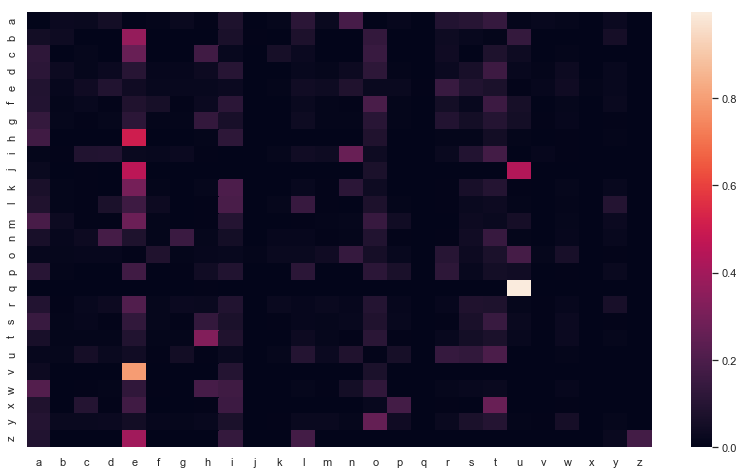

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

### Практика - постройте матрицу вероятности для русской версии книги

In [10]:
with open('materials/alice_ru.txt', 'r', encoding='koi8-r') as f:
    text_ru = f.read().lower()
text_ru = re.sub('[^а-я]','', text_ru)

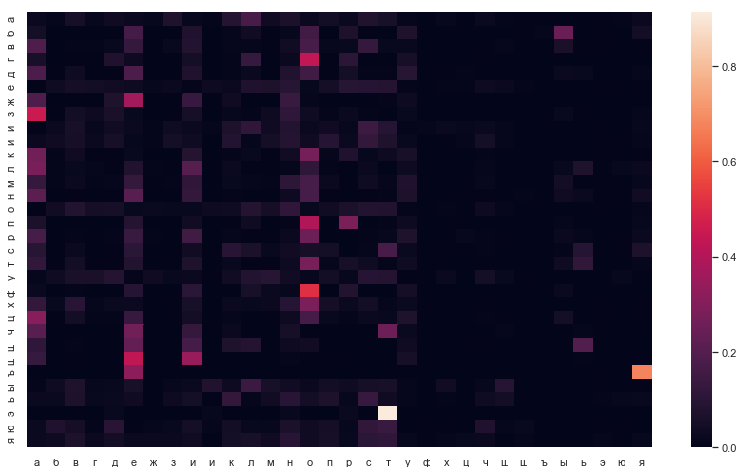

In [11]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS_RU = {l: i for i, l in enumerate(RUSSIAN)}

probabilities_ru = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text_ru[:-1], text_ru[1:]):
    probabilities_ru[POS_RU[cp], POS_RU[cn]] += 1
    
probabilities_ru = (probabilities_ru / probabilities_ru.sum(axis=1)[:, None])

df_ru = pd.DataFrame(probabilities_ru, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(14,8))
sns.heatmap(df_ru)
plt.show()

# Траектория в цепи

Теперь вопрос: допустим, что у нас есть какая-то траектория (последовательность состояний). Какова её вероятность? Ответ на этот вопрос даст одна простая теорема.

**Теорема о состояниях марковской цепи**

Для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_0=i_0,X_1=i_1,…,X_n=i_n)=α_{i_0}p_{i_0i_1}…p{i_{n−1}i_n}.$

Пример: Пусть вероятность начального состояния цепи для букв английского алфавита равна $\dfrac{1}{26}$.
Чему равна вероятность наблюдать строку "hello"?

In [12]:
string = "hello"
proba = 1.0 / 26
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[POS[cp], POS[cn]]
print(proba)

5.348363016330027e-07


**Следствие.** Для любого натурального $n$ и любого $i_n \in E$

$P(X_n=i_n) = \sum \limits_{i_0,…,i_{n−1} \in E} \alpha i_0p_{i_0i_1}…p_{i_{n−1}i_n}$.

Но обычно нас не интересует полный путь, а лишь начало и конец. Поэтому вводят вероятность перейти из состояния $i$ в состояние $j$ за $n$ шагов:

$p_{ij}^{(n)}=P(X_n=j|X_0=i)$

Чему равна эта вероятность?

$P(X_n=j|X_0=i)=\dfrac{P(X_n=j,X_0=i)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} \dfrac{P(X_0=i, X_1=i_1,...,X_{n-1}=i_{n-1}, X_n = j)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} p_{ii_1}...p_{i_{n-1}j}$

Если мы посмотрим на случай $n=2$, то полученное выражение очень похоже на скалярное произведение строк матрицы переходной вероятности. 

**Вопрос:** как подсчитать вероятность, что слово из 3 букв начинается на букву "h" и заканчивается на букву "y"?

In [13]:
start = POS['h']
end = POS['y']
prior = 1. / len(ENGLISH)
for c in ENGLISH:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['h', c, 'y']), proba)

hay 0.00019786241179454468
hby 3.2498131357446945e-06
hcy 2.5963886570530186e-07
hdy 2.00246712505073e-06
hey 0.00041670464060019366
hfy 2.4496387427496224e-06
hgy 2.2022341052346015e-07
hhy 3.0694052582470812e-06
hky 1.0202901705244971e-07
hly 6.987940162352581e-06
hmy 4.054691865351508e-06
hny 1.0187698076726042e-06
hoy 2.0758961455728112e-05
hpy 2.095534994542692e-06
hry 2.9097918521227684e-05
hsy 2.6301624264116166e-06
hty 2.5534949950507335e-05
huy 2.316043298098595e-07
hvy 3.0372085380791536e-08
hwy 6.902550257831721e-07
hyy 4.816238159185105e-06


Это работает не всегда. Почему же? Потому что никто не обещал, что переходная вероятность не зависит от шага. Если она действительно не зависит, то говорят, что марковская цепь однородна.

# Генерирование выборок из марковской цепи

Как создать реализацию длины $N$ из марковской цепи?
Сгенерировать начальное состояние согласно распределению $\alpha_i≡P(X_0=i)$, положить $n \leftarrow 0$.
Пока $n<N$, повторять:
- Имея контекст $X_n$, сгенерировать состояние $X_{n+1}$ из распределения $P(X_{n+1}|X_n)$
- Положить $n \leftarrow n+1$

In [14]:
s = []
start = np.random.choice(list(ENGLISH))
s.append(start)
length = 10
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(ENGLISH), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

idcecksoxio


### Практика: сгенерируйте все возможные комбинации строк из марковской цепи (длины 4) и отобразите их вероятность

In [21]:
def get_letter_and_prob(prev_letter=None):
    if prev_letter is None:
        for s in list(ENGLISH):
            yield s, 1.0 / 26
    else:
        p = POS[prev_letter]
        prob = probabilities[p]
        for s in list(ENGLISH):
            sp = POS[s]
            yield s, prob[sp]

In [22]:
for s1, p1 in get_letter_and_prob():
    for s2, p2 in get_letter_and_prob(s1):
        for s3, p3 in get_letter_and_prob(s2):
            prob = p1 * p2 * p3
            if prob > 0:
                print(s1+s2+s3, prob)

aaa 4.840796504656876e-08
aab 1.2190005743545041e-06
aac 1.1573904370225076e-06
aad 2.2663729089984464e-06
aae 8.80144819028523e-09
aaf 4.796789263705451e-07
aag 1.1441882647370798e-06
aah 2.112347565668455e-07
aai 3.370954656879243e-06
aaj 6.601086142713921e-08
aak 6.028992010345381e-07
aal 5.003623296177152e-06
aam 1.0825781274050831e-06
aan 7.930104819446991e-06
aao 2.6404344570855687e-08
aap 8.097332335062411e-07
aaq 1.3202172285427844e-08
aar 3.859435031440073e-06
aas 4.435929887903756e-06
aat 6.178616629580231e-06
aau 3.7406154808712227e-07
aav 9.153506117896639e-07
aaw 5.632926841782547e-07
aax 5.2808689141711375e-08
aay 1.3070150562573565e-06
aaz 2.2003620475713073e-08
aba 5.289730051449561e-05
abb 4.1073198046549535e-05
abd 6.223211825234778e-07
abe 0.0004045087686402606
abh 6.223211825234778e-07
abi 7.467854190281734e-05
abj 4.978569460187823e-06
abl 8.027943254552863e-05
abm 6.223211825234778e-07
abn 1.2446423650469557e-06
abo 0.00014375619316292338
abp 1.8669635475704334e-0

# Модели временных рядов с переключениями

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1. Простейшая модель переключения для переменной $z_t$ состоит из двух спецификаций типа AR:

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$
 
где $|\beta|<1$ и $\epsilon_t i.i.d.$ с нулевым средним и дисперсией $\sigma^2_\epsilon$.

In [69]:
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
s = np.random.binomial(n=1, p=0.8, size=100)
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps

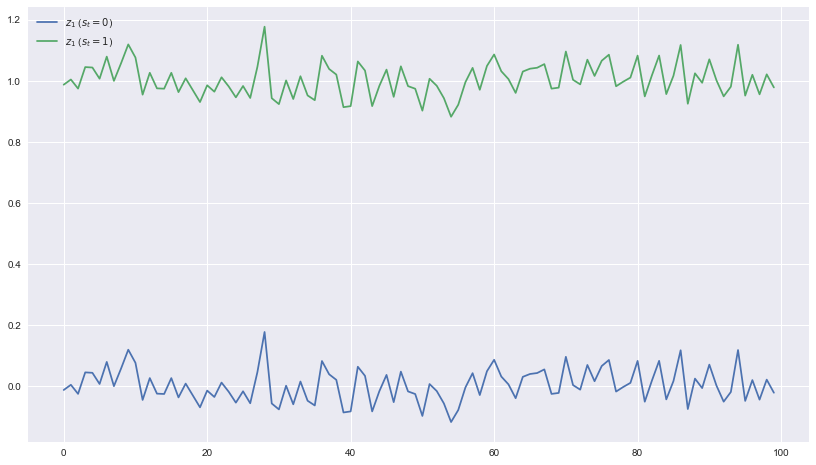

In [71]:
plt.figure(figsize=(14,8))
plt.plot(z1, label='$z_1$ ($s_t = 0$)')
plt.plot(z2, label='$z_1$ ($s_t = 1$)')
plt.legend()
plt.show()

In [72]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

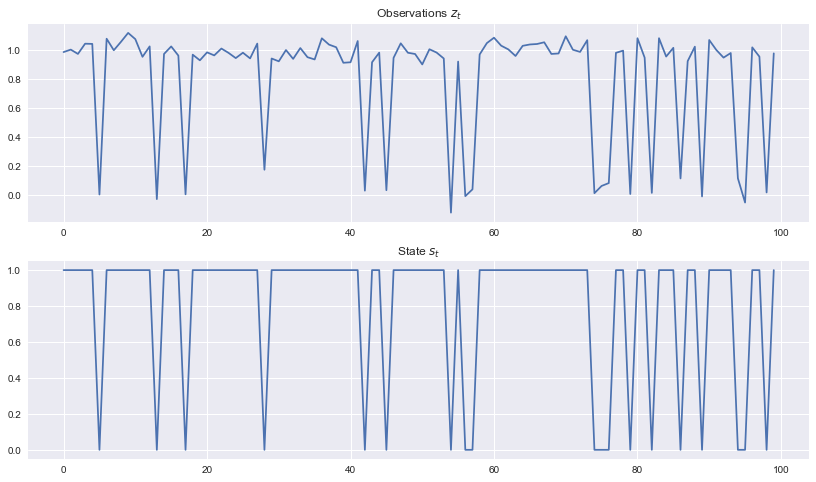

In [74]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

Это стационарный AR(1) процесс со средним $\dfrac{\alpha_0}{1-\beta}$ при $s_t=0$ и переключающийся на другой стационарный AR(1) процесс со средним $\dfrac{\alpha_0+\alpha_1}{1-\beta}$, когда $s_t$ переключается с 0 на 1.

- если $a_1 \ne 0$: два динамических паттерна в зависимости от значения переменной состояния $s_t$;
- в этом случае $z_t$ управляется двумя распределениями с разным средним;
- переменная $s_t$ отвечает за переключение между этими распределениями (режимами).

Только что показанный пример: $s_t \sim Bern(p),p=0.8$.

В этой модели $s_t$ не зависит от предыдущих и будущих реализаций, поэтому $z_t$ может сильно "прыгать" (часто переключаться между разными состояниями).

### Практика. Сгенерируйте модель с переключениями на основе двух моделей AR(2)

In [23]:
def make_ar2(a0, a1, a2, n):
    noise = np.random.normal(size=n)
    result = [a0 + noise[0], a0 + a1 * (a0 + noise[0]) + noise[1]]
    for i in range(2, n):
        result.append(a0 + a1*result[i-1] + a2*result[i-2] + noise[i])
    return np.array(result)

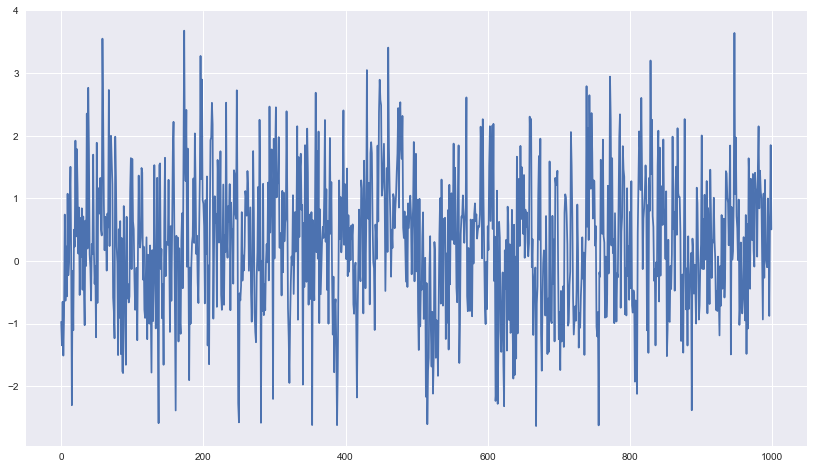

In [45]:
ar_1 = make_ar2(0.2, 0.2, 0.2, 1000)
plt.figure(figsize=(14,8))
plt.plot(ar_1)
plt.show()

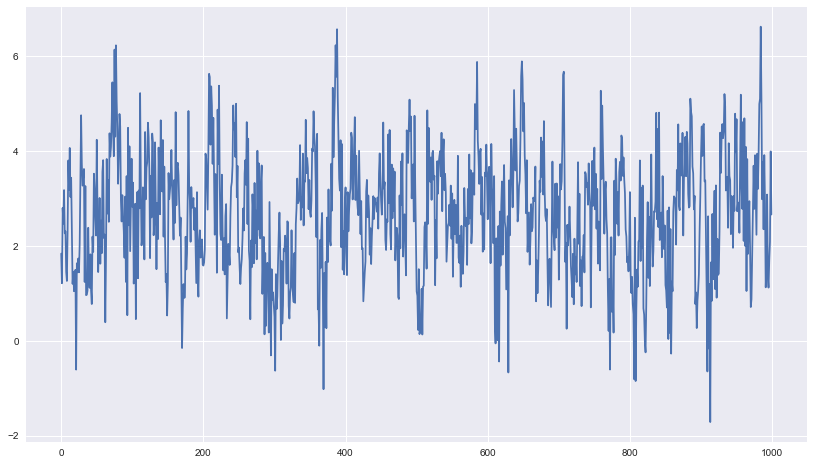

In [46]:
ar_2 = make_ar2(0.8, 0.3, 0.4, 1000)
plt.figure(figsize=(14,8))
plt.plot(ar_2)
plt.show()

In [49]:
s = np.random.binomial(n=1, p=0.5, size=1000)

In [50]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(ar_1[t])
    else:
        z.append(ar_2[t])

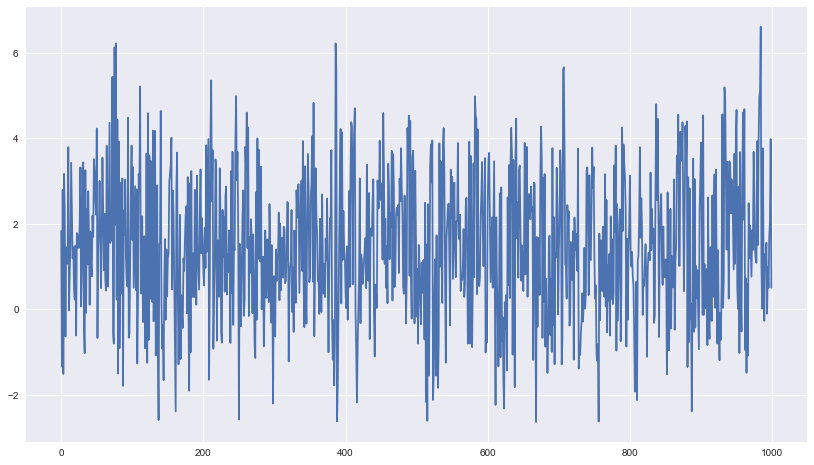

In [51]:
plt.figure(figsize=(14,8))
plt.plot(z)
plt.show()

## Что такое модель с марковским переключением?

Пусть, как раньше,

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1 согласно марковской цепи первого порядка:

$P=\begin{pmatrix} P(s_t=0|s_{t-1}=0) & P(s_t=1|s_{t-1}=0 \\ P(s_t=0|s_{t-1}=1) & P(s_t=1|s_{t-1}=1 \end{pmatrix} = \begin{pmatrix} p_{00} & p_{01} \\ p_{10} & p_{11} \end{pmatrix}$

где за $p_{ij},i,j∈\{0,1\}$ обозначена вероятность перехода в состояние $s_t=j$ из состояния $s_{i−1}=i$.

- Матрица перехода управляет случайным поведением переменной состояния и зависит только от двух параметров ($p00$
 и $p11$).
- Модель такого типа называют моделью с марковскими переключениями.
- Свойства $z_t$ определяются характеристиками распределения как $\epsilon_t$, так и переменной состояния $s_t$.
- В частности, марковская переменная состояния приводит к случайным и частым сменам режима, а вероятности перехода определяют персистентность каждого из режимов.

Важный факт: распределение наблюдений обусловлено ненаблюдаемой переменной состояния:
$Law(z_t)=Law(z_t|s_t)$

Например:
- $Law(z_t|s_t=0) = N(\dfrac{\alpha_0}{1-\beta}, \sigma_\epsilon^2)$
- $Law(z_t|s_t=1) = N(\dfrac{\alpha_0 + \alpha_1}{1-\beta}, \sigma_\epsilon^2)$

# Как сгенерировать траекторию модели с марковскими переключениями?

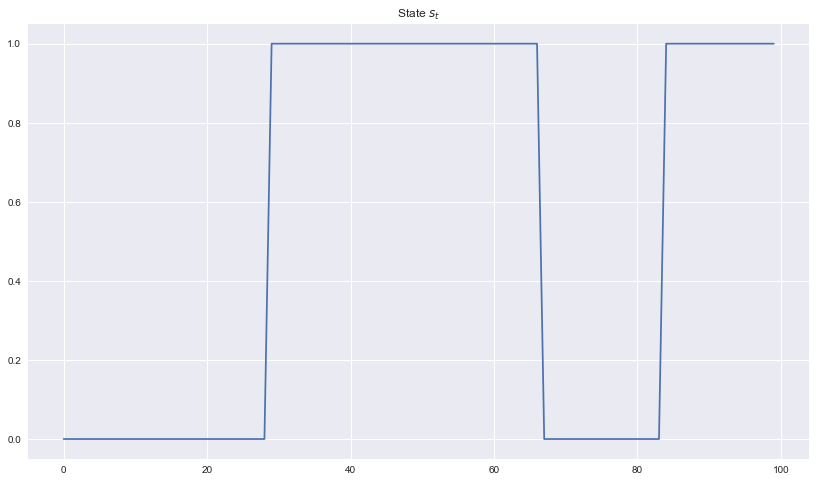

In [77]:
# 1. Генерирование марковской цепи с 2 скрытыми состояниями
P = np.array([
    [0.95, 0.05],
    [0.05, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$')
plt.show()

In [78]:
# 2. Генерирование наблюдений из распределений, обусловленных ненаблюдаемым состоянием
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

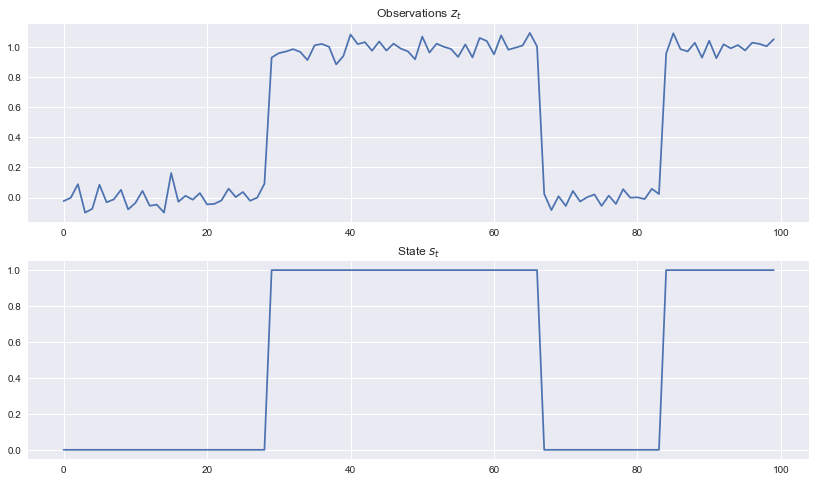

In [79]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

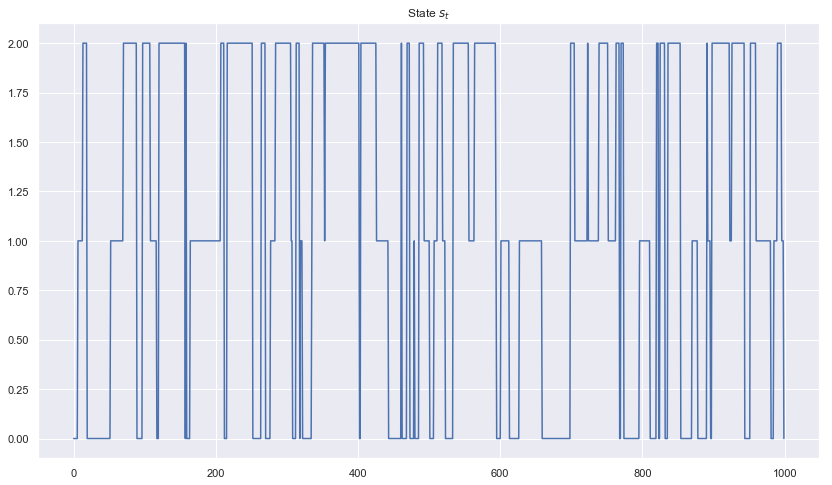

In [38]:
P = [
    [0.9, 0.05, 0.05],
    [0.05, 0.9, 0.05],
    [0.05, 0.05, 0.9]
]
ar_1 = make_ar2(0.2, 0.2, 0.2, 1000)
ar_2 = make_ar2(0.3, 0.3, 0.3, 1000)
ar_3 = make_ar2(0.4, 0.4, 0.4, 1000)


s = [0]
for t in range(999):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1, 2], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$')
plt.show()

In [41]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(ar_1[t])
    elif s_t == 1:
        z.append(ar_2[t])
    else:
        z.append(ar_3[t])

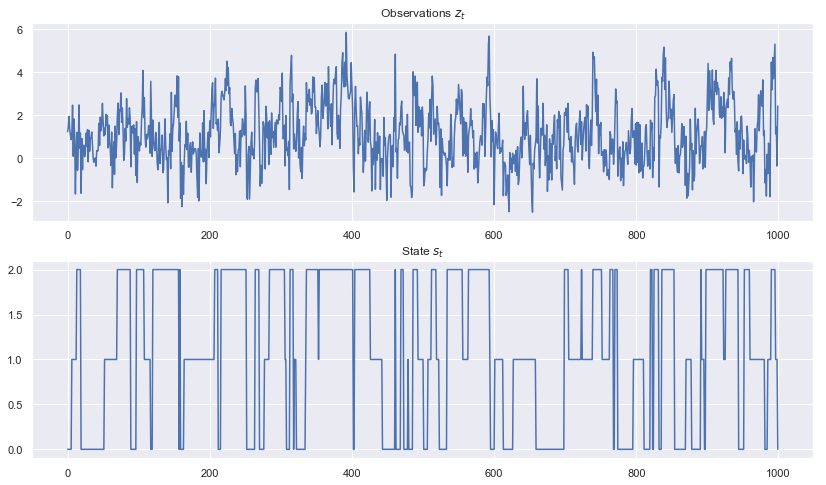

In [43]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

# Что такое скрытые марковские модели?

**Определение.** Скрытая марковская модель (первого порядка) - это вероятностная модель последовательности, которая состоит из набора наблюдаемых переменных $X={x_1,…,x_n}$, где $x_k \in R^d$, и набора латентных (или скрытых) 
переменных

$T={t_1,...,t_n}, t_k \in \{0,1\}^K, \sum \limits_{i=1}^K t_{ki} = 1$.

- латентные переменные являются бинарными и кодируют $K$ состояний: переменные состояния;
- значения наблюдаемого вектора $x_k$ в момент времени $k$ зависят только от скрытого состояния $t_k$;
- $t_k$, в свою очередь, зависит только от $t_{k−1}$.

Пусть в скрытой марковской модели $K$ состояний. Закодируем их состояния в момент времени $n$ бинарным вектором $t_n=(t_{n1},…,t_{nK})$ по правилу:

$t_{ij} = \begin{cases} 1, & \mbox{ система находится в состоянии j в момент времени i} \\ 0, & \mbox{иначе} \end{cases}$

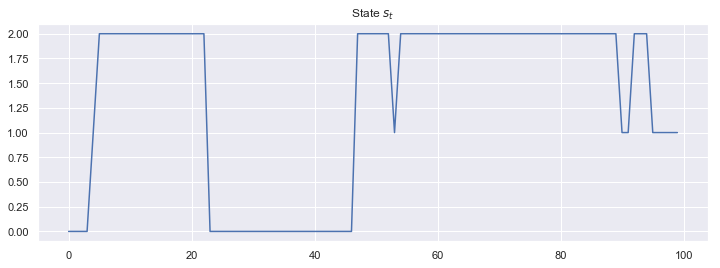

In [15]:
P = np.array([
    [0.95, 0.025, 0.025],
    [0.025, 0.95, 0.025],
    [0.025, 0.025, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1, 2], p=distribution))
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(s)
_ = axs.set_title('State $s_t$')
plt.show()

In [83]:
np.array(s)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0])

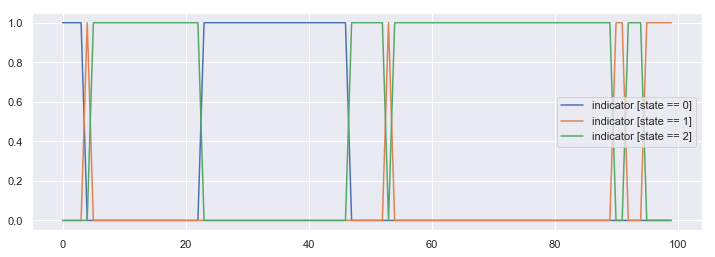

In [16]:
t = np.zeros((3, 100))
for i in range(3):
    t[i, :] = (np.array(s) == i).astype(int)
    
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
for i in range(3):
    _ = axs.plot(t[i, :], label='indicator [state == {}]'.format(i))
_ = axs.legend()

In [85]:
a, b = np.where(t)
assert np.all(np.array(a[np.argsort(b)]) == np.array(s))

Свойства такого формализма:

- в векторе $t_n$ может быть только один ненулевой элемент;
- предполагается, что система не может находиться в двух разных состояниях одновременно;
- распределение $t_n$ относительно $t_{n−1} -- p(t_n∣t_{n−1})$: матрица $A$, где $A_{ij}=p(t_{nj}=1∣t_{n−1,i}=1)$.

Стоит заметить, что $\sum \limits_{j=1}^K A_{ij}=1$. Следовательно, распределение можно записать следующим образом:

$p(t_n|t_{n-1}) = \prod\limits_{i=1}^K \prod\limits_{j=1}^K A_{ij}^{t_{n-1,i^{t_{nj}}}}$

- Начальное распределение $p(t1)$. Пусть $\pi_i=p(t_{1i}=1)$. Тогда

$p(t_1)=\prod\limits_{i=1}^K \pi_i^{t_{1i}}$.

- Обычно используются матрицы $A$ с преобладающими элементами на диагонали (более вероятно, что система не изменит своего состояния).
- Переменная $x_n$ зависит только от переменной состояния $t_n$: разумно рассматривать условное распределение $p(x_n∣t_n)$. Обычно предполагается, что оно известно с точностью до параметров $phi_k,k \in \{1,…,K\}$: то есть, если $t_{ni}=1$, то $p(x_n∣t_n)=p(x_n∣\phi_i)$.

$p(x_n∣t_n)=\prod\limits_{k=1}^K p(x_n∣\phi_k)^{t_{nk}}$.

Введённых параметров достаточно для полного описания скрытой марковской модели. Их собирают в набор параметров
$\Theta=(\pi,A,\phi)$, где $\pi=(\pi_1,…,\pi_K),\phi=(\phi1,…,\phi_K)$.


Основные задачи теории скрытых марковских процессов:
    
- **Обучение с учителем**. Пусть есть некоторая последовательность $X$, для которой известны латентные переменные $T$. По обучающей выборке нужно оценить набор параметров $\Theta$.
- **Сегментация**. Пусть известна последовательность наблюдаемых переменных $X$ и набор параметров $\Theta$. По ним нужно построить максимально правдоподобный набор латентных переменных $T$, то есть найти $argmax_T p(T∣X,\Theta)$.
- **Обучение без учителя**. Пусть известна последовательность наблюдаемых переменных $X$ и число состояний $K$. Нужно оценить набор параметров $\Theta$. Подзадача - **нахождение маргинального распределения**: найти $p(t_n∣X,\Theta)$.
- **Прогнозирование**. Пусть известна некоторая последовательность X длины N. Нужно оценить наблюдаемый вектор в момент времени $N+1$, то есть найти $p(x_{N+1}∣X)$.

# Как сгенерировать траекторию скрытой марковской модели?

In [17]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

No handles with labels found to put in legend.


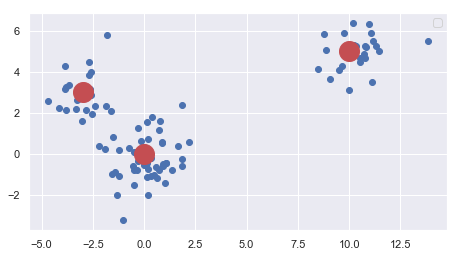

In [18]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.scatter(X[:, 1], X[:, 0])
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

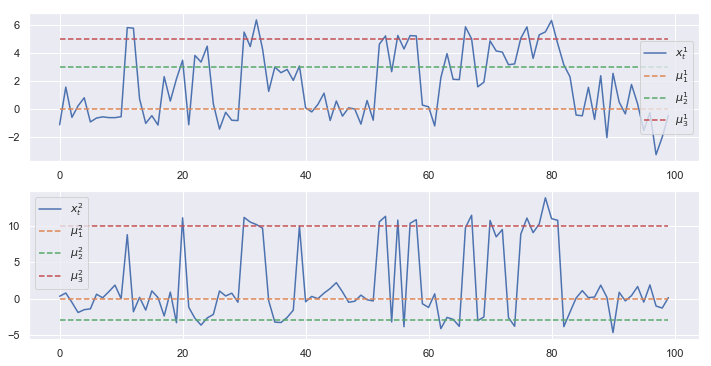

In [19]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in range(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

# Прогноз с использованием HMM

In [20]:
from hmmlearn.hmm import GaussianHMM

In [21]:
series = pd.read_csv("Series/daily-total-female-births-in-cal.csv")["Count"]

In [22]:
values = series.values.reshape(-1,1)

In [23]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1245.3909354932189
2 -1231.414547976929
3 -1228.637624195839
4 -1222.480614437125
5 -1214.0854041790653
6 -1208.2775972401955
7 -1200.8324305909075
8 -1191.2120452545494
9 -1173.4922234634848
10 -1159.8226949636676
11 -1157.6990214654295
12 -1135.6802958963447
13 -1136.7101399038795


In [27]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)

In [28]:
model.fit(values)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=10, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [29]:
model.transmat_

array([[3.31035386e-002, 2.35168120e-001, 5.83567103e-002,
        1.20137107e-001, 5.95243876e-013, 6.31755989e-014,
        1.06331603e-001, 9.41439417e-005, 4.05876232e-001,
        4.09325449e-002],
       [4.57188570e-022, 8.48378478e-031, 4.11384771e-001,
        7.54472360e-069, 5.15442232e-002, 3.01770800e-001,
        7.73327357e-002, 7.34377003e-043, 1.70054582e-010,
        1.57967470e-001],
       [1.04684776e-001, 1.59995797e-001, 5.98147014e-001,
        6.23040056e-055, 3.65531886e-007, 8.71506342e-002,
        7.51378974e-021, 1.60196735e-016, 1.96917424e-002,
        3.03296708e-002],
       [1.53651590e-026, 1.44471279e-012, 1.30348188e-067,
        3.00815769e-035, 2.98972055e-010, 7.20933565e-001,
        2.79066434e-001, 1.30443123e-130, 1.37297082e-077,
        4.82914954e-020],
       [7.87123884e-002, 1.65994399e-011, 3.22769455e-001,
        9.46628965e-030, 2.53056448e-001, 1.76093258e-016,
        1.66706156e-042, 1.35585088e-001, 1.06641720e-001,
        1.0

In [30]:
model.means_

array([[40.66119353],
       [51.46993518],
       [35.5574167 ],
       [61.98145018],
       [45.14798741],
       [42.99626776],
       [56.21213434],
       [30.70027152],
       [37.83602584],
       [46.93124764]])

In [31]:
model.covars_

array([[[ 7.20430406]],

       [[ 2.54050015]],

       [[ 7.56006266]],

       [[37.73784184]],

       [[ 1.85009745]],

       [[ 3.30770964]],

       [[ 1.69848713]],

       [[15.0568896 ]],

       [[ 2.6215541 ]],

       [[ 3.11308437]]])

In [32]:
labels = model.predict(values)

In [33]:
labels

array([7, 7, 7, 7, 4, 7, 5, 0, 8, 7, 7, 7, 6, 9, 5, 0, 1, 5, 0, 1, 2, 1,
       2, 2, 2, 5, 0, 8, 4, 8, 7, 7, 7, 5, 0, 1, 2, 1, 2, 2, 1, 2, 9, 1,
       2, 1, 9, 5, 0, 8, 4, 2, 2, 1, 5, 5, 0, 8, 7, 7, 7, 4, 2, 2, 1, 5,
       0, 2, 2, 5, 0, 8, 7, 7, 7, 5, 5, 0, 8, 4, 4, 4, 2, 2, 2, 1, 2, 2,
       1, 5, 0, 8, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 8, 4, 7,
       4, 9, 1, 2, 2, 2, 5, 0, 6, 1, 2, 2, 2, 2, 8, 4, 2, 1, 2, 2, 2, 2,
       5, 5, 0, 8, 7, 7, 5, 0, 3, 5, 5, 0, 8, 4, 2, 2, 5, 0, 8, 4, 4, 2,
       2, 9, 1, 2, 2, 5, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 8, 4, 8, 4, 7, 7,
       5, 5, 5, 0, 3, 5, 5, 0, 8, 4, 0, 6, 9, 1, 5, 4, 7, 7, 5, 5, 0, 8,
       4, 4, 4, 4, 8, 4, 2, 2, 8, 4, 4, 4, 2, 0, 1, 2, 5, 0, 3, 5, 0, 8,
       4, 9, 9, 5, 0, 8, 4, 4, 2, 0, 8, 4, 4, 0, 8, 4, 9, 1, 5, 0, 1, 5,
       5, 0, 3, 5, 0, 1, 5, 5, 0, 3, 5, 0, 1, 2, 2, 0, 6, 9, 1, 6, 0, 3,
       6, 3, 6, 9, 5, 0, 9, 1, 6, 9, 1, 6, 9, 5, 5, 5, 0, 1, 9, 5, 0, 3,
       5, 0, 1, 9, 5, 5, 0, 8, 4, 2, 2, 0, 8, 7, 4,

In [34]:
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

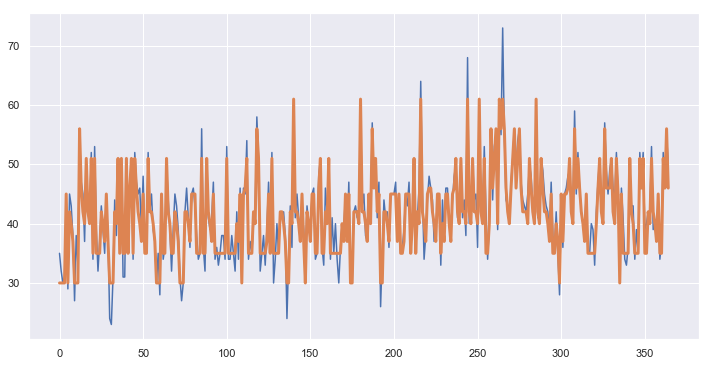

In [24]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [25]:
labels

array([8, 8, 8, 8, 4, 8, 5, 0, 9, 8, 8, 8, 1, 3, 5, 0, 7, 5, 0, 7, 2, 7,
       2, 2, 2, 5, 0, 9, 4, 9, 8, 8, 8, 5, 0, 7, 2, 7, 2, 2, 7, 2, 3, 7,
       2, 7, 3, 5, 0, 9, 4, 2, 2, 7, 5, 5, 0, 9, 8, 8, 8, 4, 2, 2, 7, 5,
       0, 2, 2, 5, 0, 9, 8, 8, 8, 5, 5, 0, 9, 4, 4, 4, 2, 2, 2, 7, 2, 2,
       7, 5, 0, 9, 4, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 0, 9, 4, 8,
       4, 3, 7, 2, 2, 2, 5, 0, 1, 7, 2, 2, 2, 2, 9, 4, 2, 7, 2, 2, 2, 2,
       5, 5, 0, 9, 8, 8, 5, 0, 6, 5, 5, 0, 9, 4, 9, 8, 5, 0, 9, 4, 4, 2,
       2, 3, 7, 2, 2, 5, 0, 7, 2, 2, 2, 2, 2, 2, 2, 0, 9, 4, 9, 4, 8, 8,
       5, 5, 5, 0, 6, 5, 5, 0, 9, 4, 0, 1, 3, 7, 5, 4, 8, 8, 5, 5, 0, 9,
       4, 4, 4, 4, 9, 4, 2, 2, 9, 4, 4, 4, 2, 0, 7, 2, 5, 0, 6, 5, 0, 9,
       4, 3, 3, 5, 0, 9, 4, 4, 2, 0, 9, 4, 4, 0, 9, 4, 3, 7, 5, 0, 7, 5,
       5, 0, 6, 5, 0, 7, 5, 5, 0, 6, 5, 0, 7, 2, 2, 0, 1, 3, 7, 1, 0, 6,
       1, 6, 1, 3, 5, 0, 3, 7, 1, 3, 7, 1, 3, 5, 5, 5, 0, 7, 3, 5, 0, 6,
       5, 0, 7, 3, 5, 5, 0, 9, 4, 2, 2, 0, 9, 8, 4,

In [26]:
model.transmat_

array([[1.85310073e-002, 1.07279651e-001, 4.68633438e-002,
        4.52368459e-002, 3.73040323e-015, 1.57633252e-014,
        1.33809909e-001, 2.35095588e-001, 8.85207730e-004,
        4.12298448e-001],
       [9.46580472e-002, 4.17077261e-029, 5.45734665e-019,
        6.66011394e-001, 1.22489230e-043, 3.72119125e-002,
        8.44313832e-002, 1.17687263e-001, 1.15271707e-128,
        1.07054775e-070],
       [1.04339566e-001, 7.39640563e-036, 5.93712738e-001,
        3.15350825e-002, 9.43080911e-007, 8.69584800e-002,
        3.10712779e-057, 1.61104216e-001, 4.05859932e-018,
        2.23489745e-002],
       [1.53073041e-019, 3.05443895e-002, 4.07767566e-023,
        1.74423378e-001, 4.17010500e-006, 3.41222211e-001,
        1.23703306e-026, 4.53805852e-001, 4.63216563e-017,
        1.37415442e-029],
       [7.71888821e-002, 9.95965404e-042, 3.21534566e-001,
        1.04394568e-001, 2.54563348e-001, 6.00541148e-018,
        2.19453626e-038, 2.85739599e-017, 1.33665201e-001,
        1.0

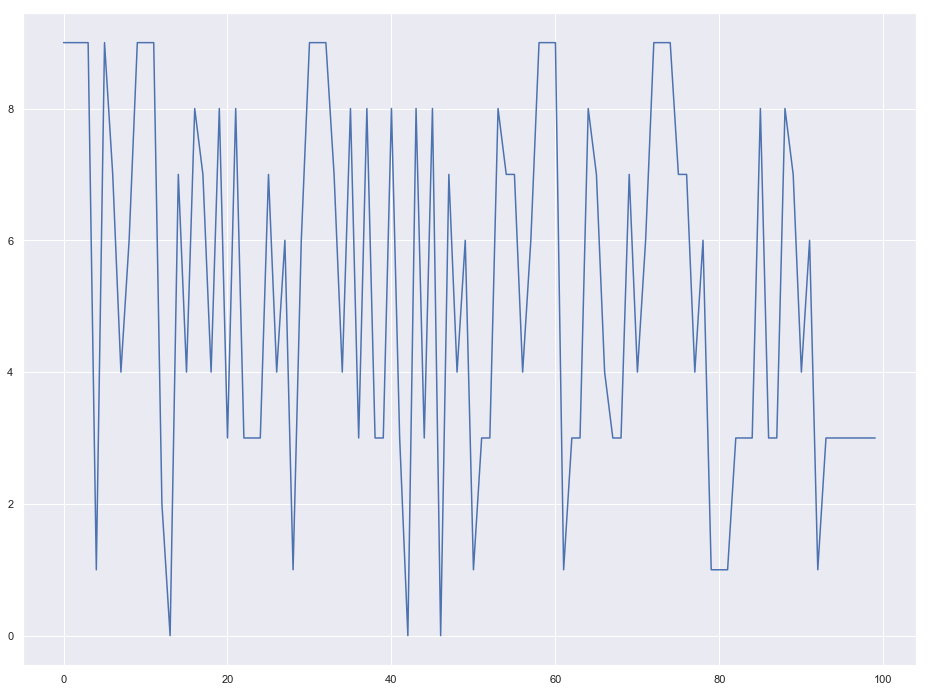

In [52]:
plt.figure(figsize=(16,12))
plt.plot(labels[:100])
plt.show()

In [53]:
model.transmat_

array([[1.74168547e-001, 2.82064100e-004, 3.08279342e-002,
        2.73362112e-020, 2.48390702e-018, 6.72518541e-031,
        3.72131418e-026, 3.38973255e-001, 4.55748199e-001,
        5.24436472e-017],
       [1.04157383e-001, 2.53572423e-001, 1.26972087e-045,
        3.23187379e-001, 7.67428167e-002, 2.64486299e-028,
        1.07091741e-001, 1.96117957e-017, 2.47841650e-013,
        1.35248257e-001],
       [6.38733906e-001, 2.16707595e-039, 4.98742880e-019,
        2.04761987e-029, 9.32339468e-002, 8.18170134e-002,
        1.02800106e-067, 7.14568334e-002, 1.14758300e-001,
        1.36861631e-123],
       [3.02851729e-002, 2.90295822e-007, 2.65999134e-021,
        5.97422021e-001, 1.05446492e-001, 2.68899789e-067,
        1.94647971e-002, 8.80999346e-002, 1.59281292e-001,
        1.78118085e-017],
       [4.39406468e-002, 5.52250391e-014, 1.10865648e-001,
        5.40510857e-002, 2.45295490e-002, 1.23302694e-001,
        4.06825584e-001, 8.91691570e-015, 2.36480266e-001,
        4.5

Эксперименты:
 * поварьировать число компонент HMM,
 * Для обучения HMM необходимо задать какое-то начальное приближение ее параметров. В этот процесс можно вмешаться с помощью явного задания априорного распределения с помощью спецификации model.transmat_. Другие параметры модели доступны по `model.<TAB>`
 * HMM обучается на основе градиентного спуска в пространстве параметров (оптимизируется правдоподобие выборки). Различные инициализации приводят (в общем случае) к различным результатам оптимизации. Попробуйте обучить набор моделей HMM для понимания, насколько устойчиво обучение. Посмотрите на model.score(X) для оценки логарифма правдоподобия обучающей выборки.
 * Число итераций, заданное для обучения, влияет на качество модели. Модель будет продолжать оптимизацию, пока не прошло n_iter шагов градиентного спуска или пока изменение score выше, чем заданный порог tol. Заметьте, что в зависимости от используемых данных модель может и не окончить оптимизацию за n_iter шагов.

## Практика. Спрогнозируйте ряд на 10 измерений вперед (через среднее каждой компоненты)

In [35]:
cur_value = labels[-1]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [36]:
new_series = np.concatenate((values, np.array(predictions)))

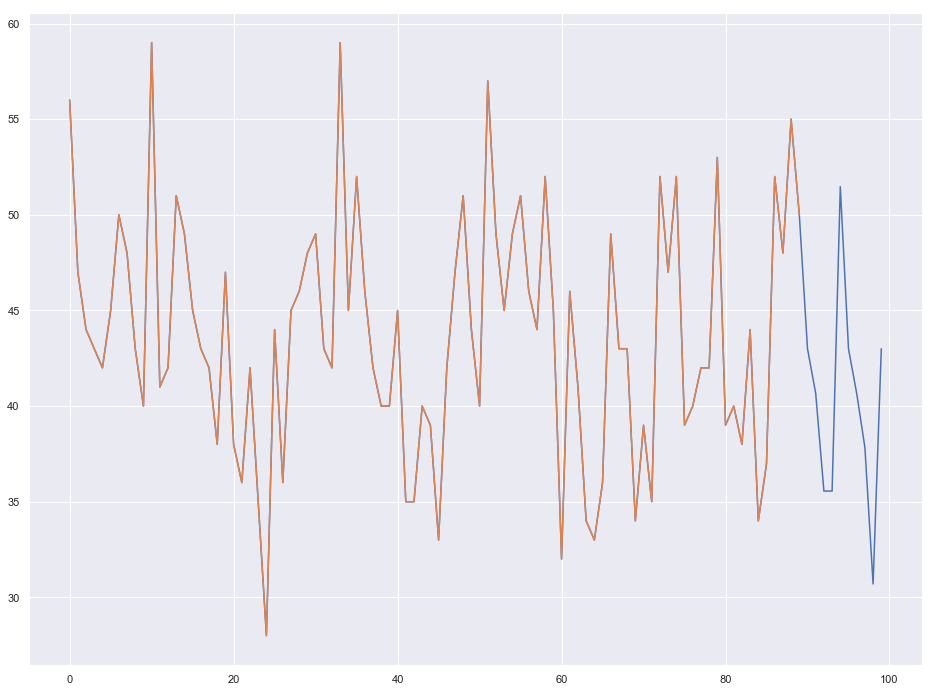

In [37]:
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()

In [38]:
cur_value = labels[-11]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

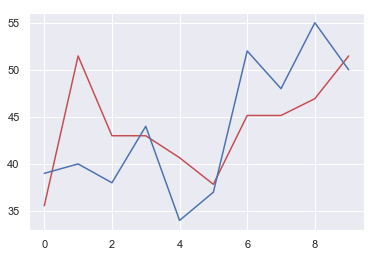

In [39]:
plt.plot(predictions, 'r-')
plt.plot(values[-10:])
plt.show()

# Материалы

- http://quantile.ru/11/11-CK.pdf

# Домашнее задание

- Скачайте текст войны и мир. Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- Возьмите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.